<a href="https://colab.research.google.com/github/kunal-git-002/Detectron-2/blob/master/pt2%20-%20human%20keypoints%20for%20single%20person.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

for single instance or person

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

In [74]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [146]:
img = cv2.imread("/content/drive/My Drive/pose detection/imgs/pose5.jpg")


In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

outputs = predictor(img)#return a dictionaries

v = Visualizer(img[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

#cv2_imshow(out.get_image()[:, :, ::-1])

In [89]:
print(type(outputs["instances"]))

<class 'detectron2.structures.instances.Instances'>


***more about "detectron2.structures.instances.Instances***

> [https://detectron2.readthedocs.io/_modules/detectron2/structures/instances.html](https://detectron2.readthedocs.io/_modules/detectron2/structures/instances.html)



# for single instance

***step 1:simplify the outputs data***

In [148]:
ins=outputs["instances"]#create output instance

op_data=ins.get_fields()#this return a all the imp data like, bboxes,confidence score,keypoints locations & classes

keypoints_data=op_data["pred_keypoints"]#give the all keypoints

#data is first moved to cpu and then converted to numpy array
keypoints_data = keypoints_data.cpu().data.numpy()

#convert into np array for easy to work
keypoints_data=np.array(keypoints_data)

#give 3 values (n,k,3)
#n=num of instances  # @ axis 0
#k=num of keypoints per instance # @axis 1
#3 # @ axis 2

#reduce dim of keypoints from (n,k,3) to (k,3)
keypoints=np.squeeze(keypoints_data,axis=0)

#locations (x,y) of every keypoint
locs_of_keypoints={}

for i in range(len(keypoints)):

  x,y,vis=keypoints[i]
  
  locs_of_keypoints[i]=(x,y)

In [ ]:
#human keypoints with respective inexs according Detectron 2 keypoints model

human_keypoints={0: 'nose',
 1: 'left_eye',
 2: 'right_eye',
 3: 'left_ear',
 4: 'right_ear',
 5: 'left_shoulder',
 6: 'right_shoulder',
 7: 'left_elbow',
 8: 'right_elbow',
 9: 'left_wrist',
 10: 'right_wrist',
 11: 'left_hip',
 12: 'right_hip',
 13: 'left_knee',
 14: 'right_knee',
 15: 'left_ankle',
 16: 'right_ankle'}

locs=human_keypoints.update(locs_of_keypoints)


***step 2 :now we combine the locs_of_keypoints & human_keypoints***

In [150]:
locs_of_human_parts={}

for i in range(17):
  locs_of_human_parts[i]=[human_keypoints[i],
                          locs_of_keypoints[i]]# name of human part, their location

In [151]:
locs_of_human_parts

{0: ['nose', (614.84546, 168.85406)],
 1: ['left_eye', (635.8041, 150.85686)],
 2: ['right_eye', (595.3839, 150.85686)],
 3: ['left_ear', (665.7449, 156.85593)],
 4: ['right_ear', (568.43713, 158.35568)],
 5: ['left_shoulder', (718.14136, 300.83353)],
 6: ['right_shoulder', (513.04663, 300.83353)],
 7: ['left_elbow', (742.09406, 465.80786)],
 8: ['right_elbow', (486.09985, 471.8069)],
 9: ['left_wrist', (782.51416, 611.2852)],
 10: ['right_wrist', (438.19452, 614.2847)],
 11: ['left_hip', (679.21826, 618.78406)],
 12: ['right_hip', (545.9815, 615.78455)],
 13: ['left_knee', (658.25964, 864.7458)],
 14: ['right_knee', (568.43713, 866.2455)],
 15: ['left_ankle', (646.2833, 1088.2109)],
 16: ['right_ankle', (586.4017, 1088.2109)]}

***step 3 : visulize the keypoints on img***

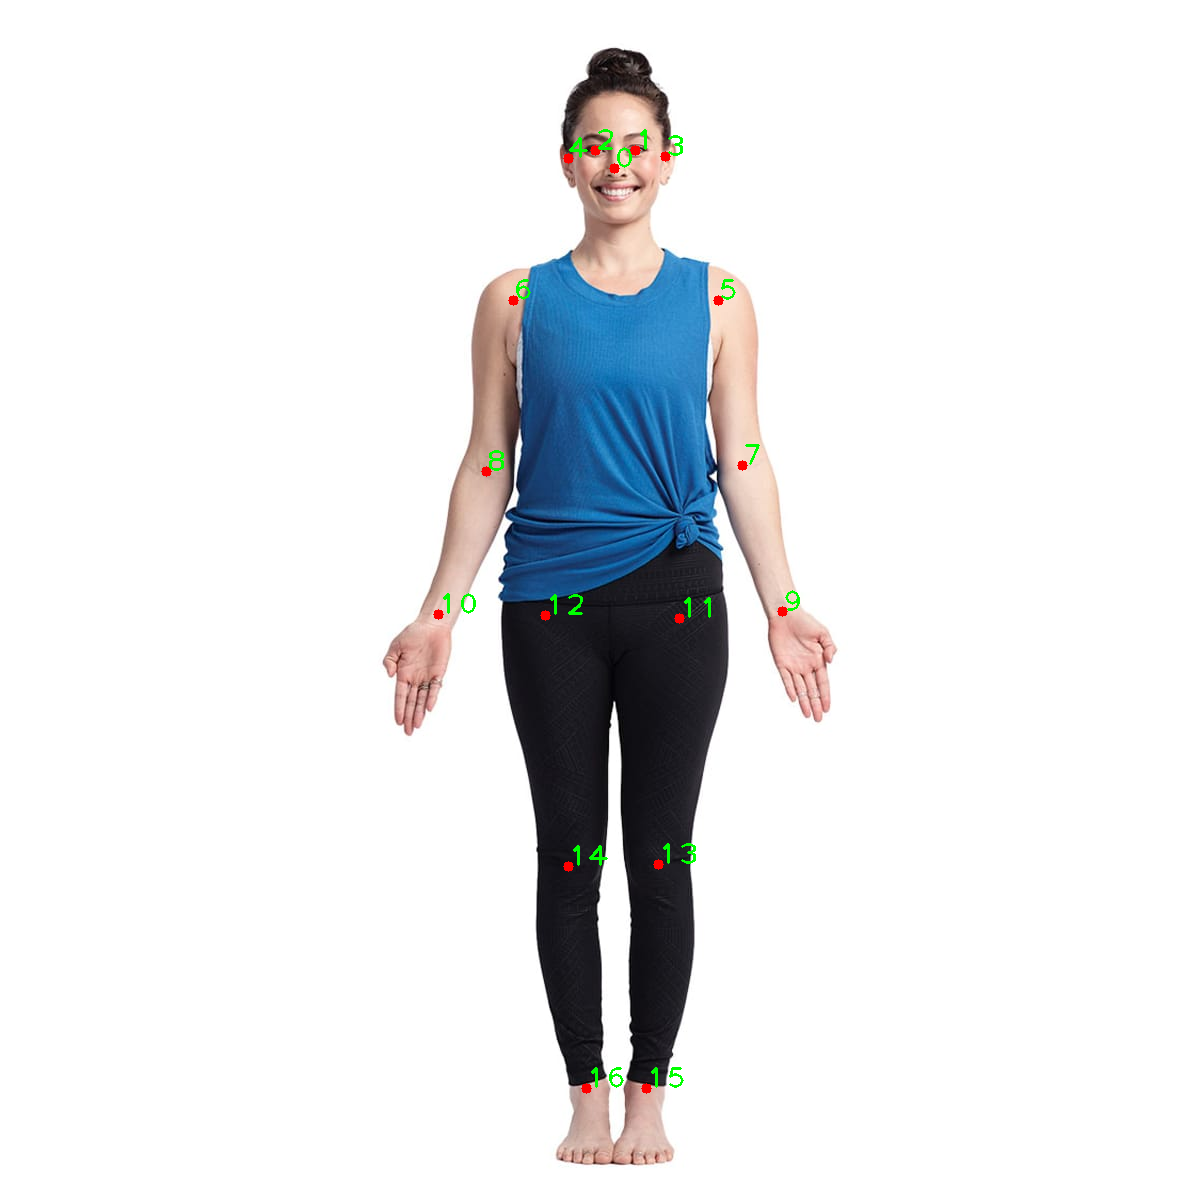

In [159]:
for i in range(17):
  
  x,y=locs_of_human_parts[i][1]

  cv2.circle(img,
             (x,y),
             5,
             (0,0,255),
             -1)
  
  cv2.putText(img,
              str(i),
              (x,y),
              cv2.FONT_HERSHEY_PLAIN,
              2,
              (0,255,0),
              2)
  
  #showing only final img
  if i==16:
    cv2_imshow(img)